In [1]:
import pickle as pkl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load Data

In [2]:
#load data
with open('dataset.pkl', 'rb') as pkl_in:
    x_train = pkl.load(pkl_in)
    y_train = pkl.load(pkl_in)
    x_test = pkl.load(pkl_in)
    y_test = pkl.load(pkl_in)

## Function for Evaluation

In [3]:
def evaluate(y_test, predicted, predicted_prob, figsize=(15,5)):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
    ## Accuracy, Precision, Recall
    auc_score = roc_auc_score(y_test, predicted_prob, multi_class="ovr")
    print("Auc:", round(auc_score,2))
    print("Detail:")
    print(classification_report(y_test, predicted, digits=4))
    
    ## Plot confusion matrix
    cm = confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], auc(fpr, tpr)))
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)
    
    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], auc(recall, precision)))
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

## Logistic Regression

In [4]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_df = 0.5, norm = 'l1', use_idf = True, max_features = None)
tfidf_X_train = tf_idf_vectorizer.fit_transform(x_train)
print(tfidf_X_train.shape)

(34265, 21958)


In [5]:
#training the model
clf = LogisticRegression(random_state=200, max_iter = 20, penalty='l2')
model = clf.fit(tfidf_X_train, y_train)

/Users/debanjana_kar/opt/anaconda3/envs/tutorial/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
#testing the model
tfidf_X_test = tf_idf_vectorizer.transform(x_test)
y_pred = model.predict(tfidf_X_test)
predicted_prob = model.predict_proba(tfidf_X_test)

In [7]:
#evaluating the model
print(classification_report(y_test, y_pred, digits=4))

               precision    recall  f1-score   support

ENTERTAINMENT     0.8853    0.7905    0.8352      4659
     POLITICS     0.8719    0.9739    0.9201      9419
         TECH     1.0000    0.0066    0.0131       607

     accuracy                         0.8757     14685
    macro avg     0.9191    0.5903    0.5895     14685
 weighted avg     0.8814    0.8757    0.8557     14685



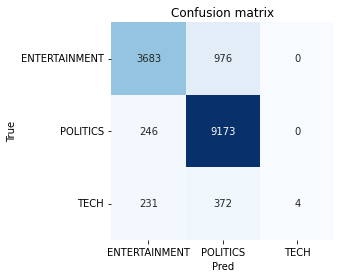

In [8]:
## Plot confusion matrix
classes = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

In [9]:
#evaluating the model - auc
auc_score = roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Auc:", round(auc_score,2))

Auc: 0.94


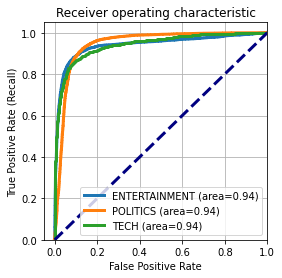

In [10]:
## Plot roc
y_test_array = pd.get_dummies(y_test, drop_first=False).values
fig, ax = plt.subplots(figsize=(4,4))
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i], predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], auc(fpr, tpr)))
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

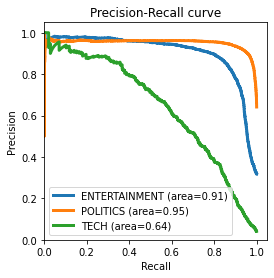

In [11]:
## Plot precision-recall curve
fig, ax = plt.subplots(figsize=(4,4))
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
    ax.plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], auc(recall, precision)))
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax.legend(loc="best")
plt.show()

Auc: 0.94
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT     0.8853    0.7905    0.8352      4659
     POLITICS     0.8719    0.9739    0.9201      9419
         TECH     1.0000    0.0066    0.0131       607

     accuracy                         0.8757     14685
    macro avg     0.9191    0.5903    0.5895     14685
 weighted avg     0.8814    0.8757    0.8557     14685



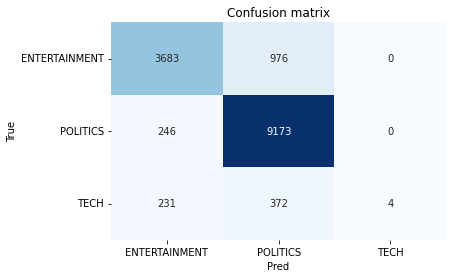

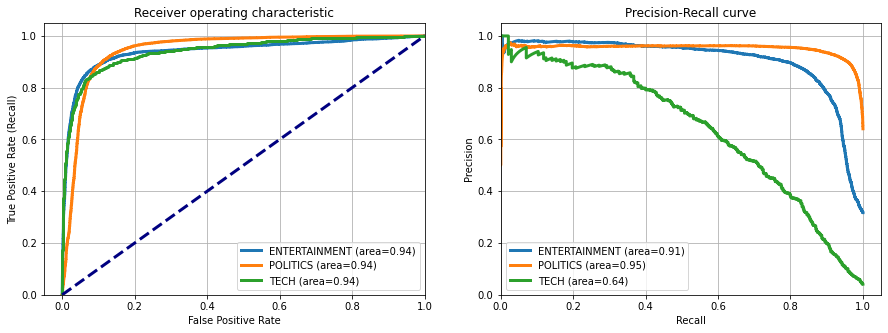

In [12]:
evaluate(y_test, y_pred, predicted_prob)

## Neural Network

In [21]:
#loading the model
clf = MLPClassifier(random_state=200, max_iter=50, activation='relu',
                    solver='adam', alpha=0.0001, batch_size='auto', 
                    learning_rate='constant',learning_rate_init=0.001)

In [22]:
model = clf.fit(tfidf_X_train, y_train)

/Users/debanjana_kar/opt/anaconda3/envs/tutorial/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
#testing the model
y_pred = model.predict(tfidf_X_test)
predicted_prob = model.predict_proba(tfidf_X_test)

Auc: 0.96
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT     0.8795    0.8852    0.8823      4659
     POLITICS     0.9336    0.9397    0.9366      9419
         TECH     0.7748    0.6573    0.7112       607

     accuracy                         0.9107     14685
    macro avg     0.8626    0.8274    0.8434     14685
 weighted avg     0.9098    0.9107    0.9101     14685



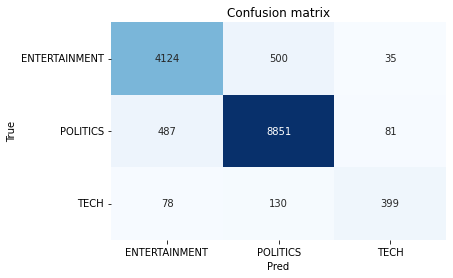

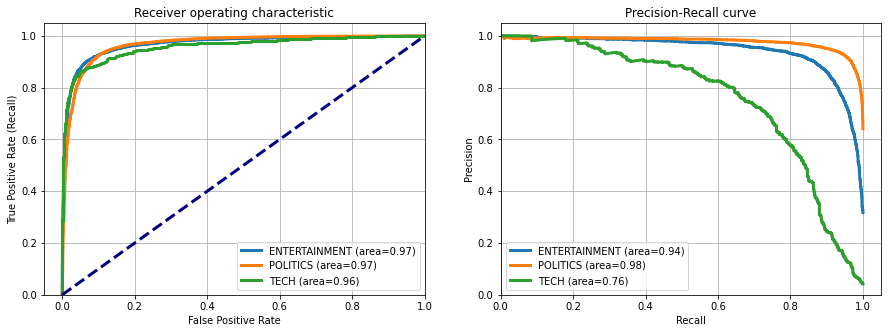

In [24]:
#evaluating the model
evaluate(y_test, y_pred, predicted_prob)